In [1]:
import pandas as pd 
import numpy as np
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9


In [7]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

1.0
0.9


In [8]:
cross_val_score(knn,X_train, y_train , cv=5, scoring='accuracy')

array([1.        , 1.        , 0.95833333, 0.95833333, 0.95833333])

In [9]:
cross_val_score(knn,X_train, y_train , cv=5, scoring='accuracy').mean()

0.975

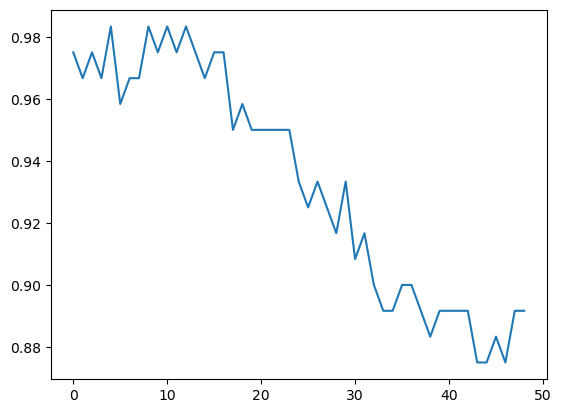

In [10]:
val_score=[]
for k in range(1,50):
        score=cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv=5).mean()
        val_score.append(score)
plt.plot(val_score)

In [11]:
from sklearn.model_selection import validation_curve

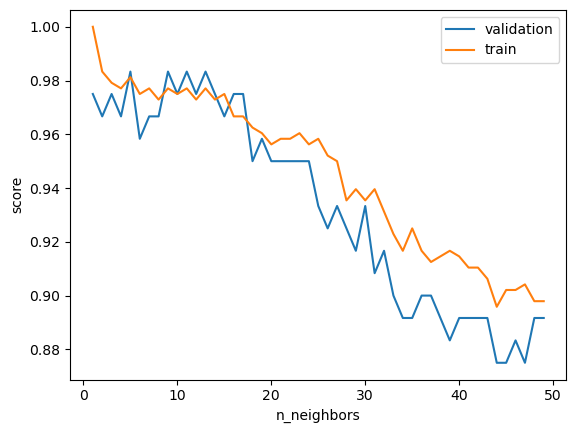

In [12]:
from sklearn.model_selection import validation_curve

knn = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(
    knn, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5
)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()


In [13]:
print(val_score.shape)


(49, 5)


In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 20),
    
    'metric': ['euclidean', 'minkowski']
}
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': range(1, 20)})

In [15]:
print(f"Meilleurs paramètres : {grid.best_params_}")
print(f"Meilleur score : {grid.best_score_}")

Meilleurs paramètres : {'metric': 'euclidean', 'n_neighbors': 5}
Meilleur score : 0.9833333333333334


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test, knn.predict(X_test))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [18]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)


[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


In [19]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


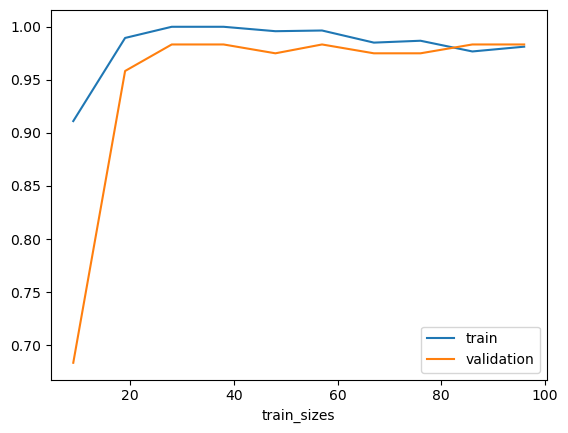

In [20]:
N, train_score, val_score=learning_curve(knn,X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N, val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [21]:
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold


In [22]:
cv=KFold(5,random_state=4,shuffle=True)
cross_val_score(KNeighborsClassifier(),X, y, cv=cv)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [23]:
cv2=LeaveOneOut()
cross_val_score(KNeighborsClassifier(),X,y,cv=cv2)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])